Import some prerequisites

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [52]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [53]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

Implement this function to detect and remove circles in the given image.

In [74]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here
    # Convert to grayscale
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)

    # Apply Hough Transform to find circles
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=80, param1=90, param2=40, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the circle in the output image
            cv2.circle(out_img, (x, y), r+2, (0, 0, 0), -1)

    return out_img

Test your implementation (dont change this cell)

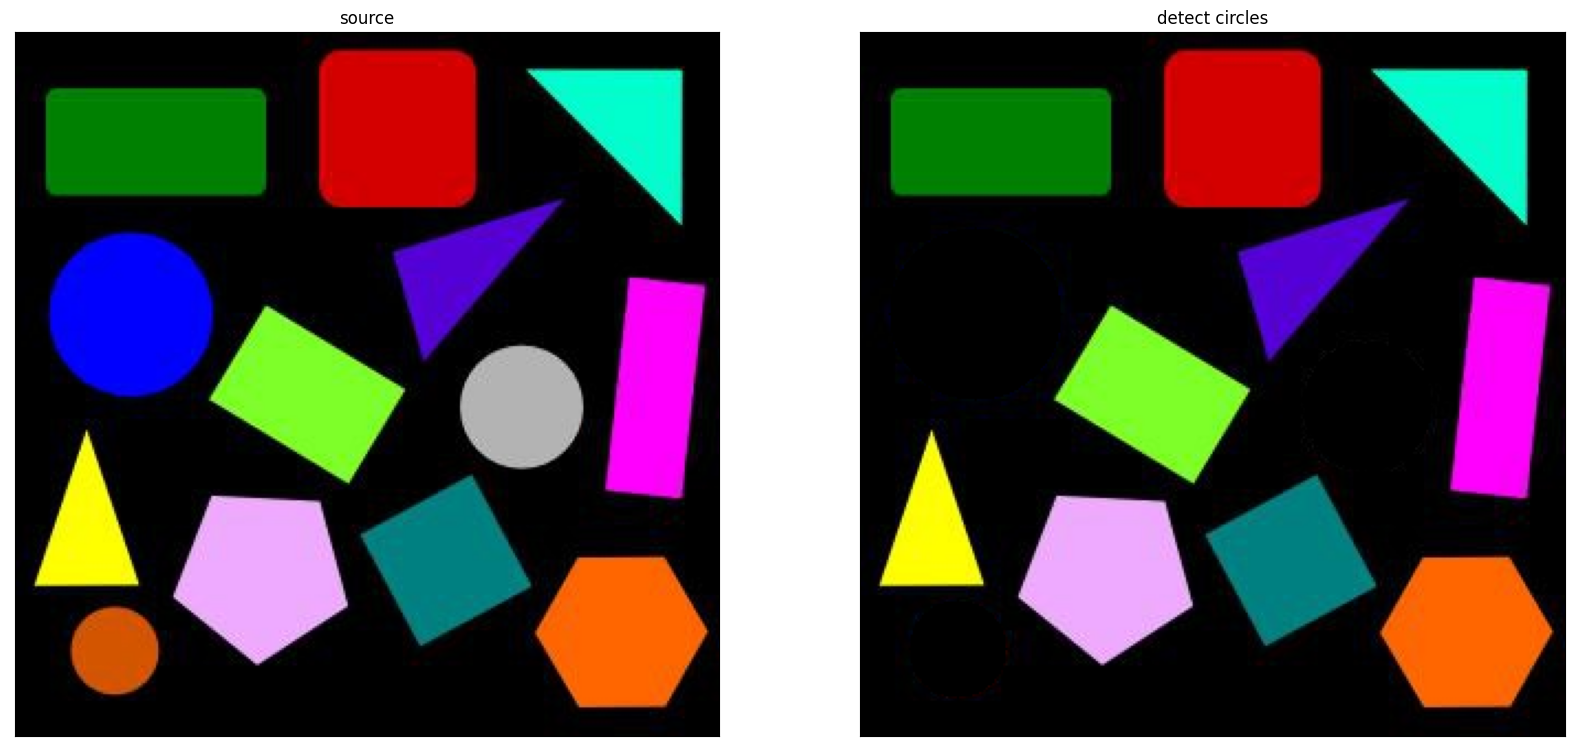

In [75]:
image_list = []

image = cv2.imread('1.jpg')
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

Implement this function to detect lines in the given image with hough algorithm.

In [128]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    
    edges = cv2.Canny(image,50,170)

    # lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=7, minLineLength=12, maxLineGap=10)  # Adjusted for sensitivity

    lines = cv2.HoughLinesP(edges, rho = 0.1, theta = 1*np.pi/180, threshold = 2, minLineLength = 0.5, maxLineGap = 2)
    print(len(lines))
    
    for i in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            out_img = cv2.line(out_img,(x1,y1),(x2,y2),(255,255,255),2)


    return out_img

Test your implementation (dont change this cell)

785


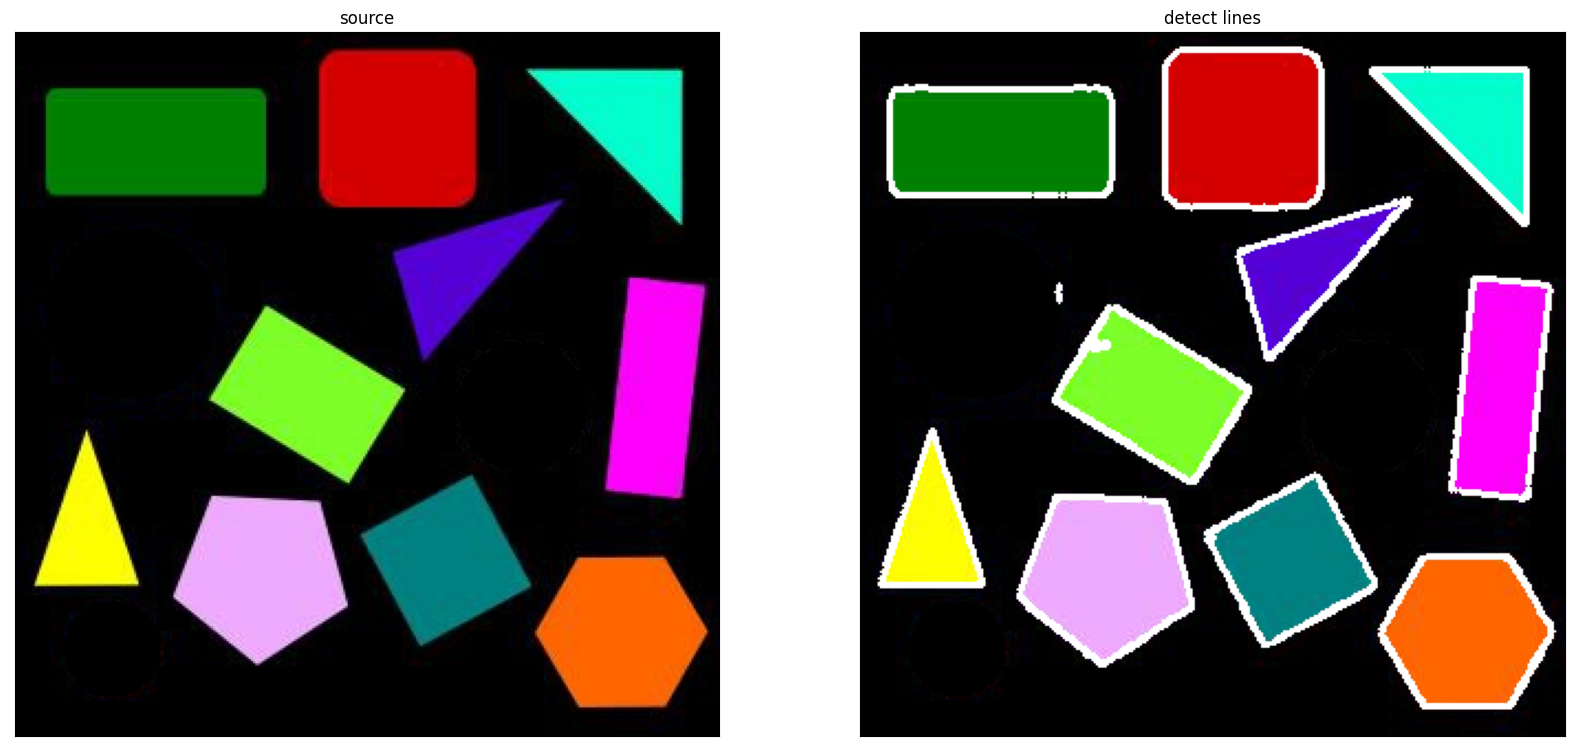

In [129]:
image_list = []

# image = cv2.imread(os.path.join('images', '1b.png'))
image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img1 = detect_lines_hough(out_img)

image_list.append([cv2.cvtColor(out_img1, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# Part d


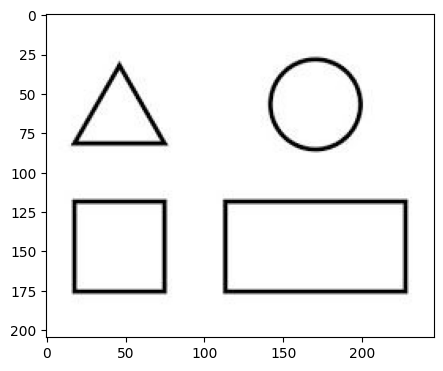

In [135]:
image = cv2.imread("7.jpg",cv2.COLOR_BGR2GRAY)
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image, cmap='gray')


Text(0.5, 1.0, 'contours')

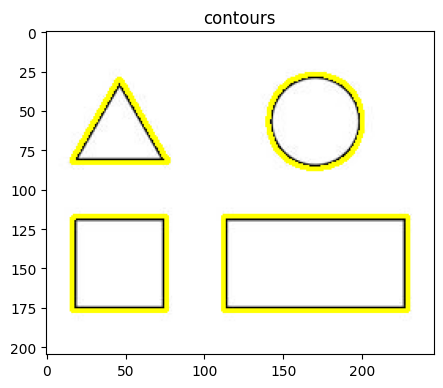

In [133]:
#with cv2.canny we can find the edges of the image
#we use canny beacuse it makes the image more clear
edged = cv2.Canny(image, 50, 100)

#cv2.findContours finds the contours of the image and returns the contours and hierarchy
#cv2.RETR_EXTERNAL returns only the extreme outer contours
#cv2.CHAIN_APPROX_NONE returns all the points of the contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#cv2.drawContours draws the contours on the image
#-1 draws all the contours
#(255, 255, 0) is the color of the contours
#2 is the thickness of the contours
cv2.drawContours(image, contours, -1, (255, 255, 0), 2)

f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image,cmap = "gray")
ax.set_title('contours')

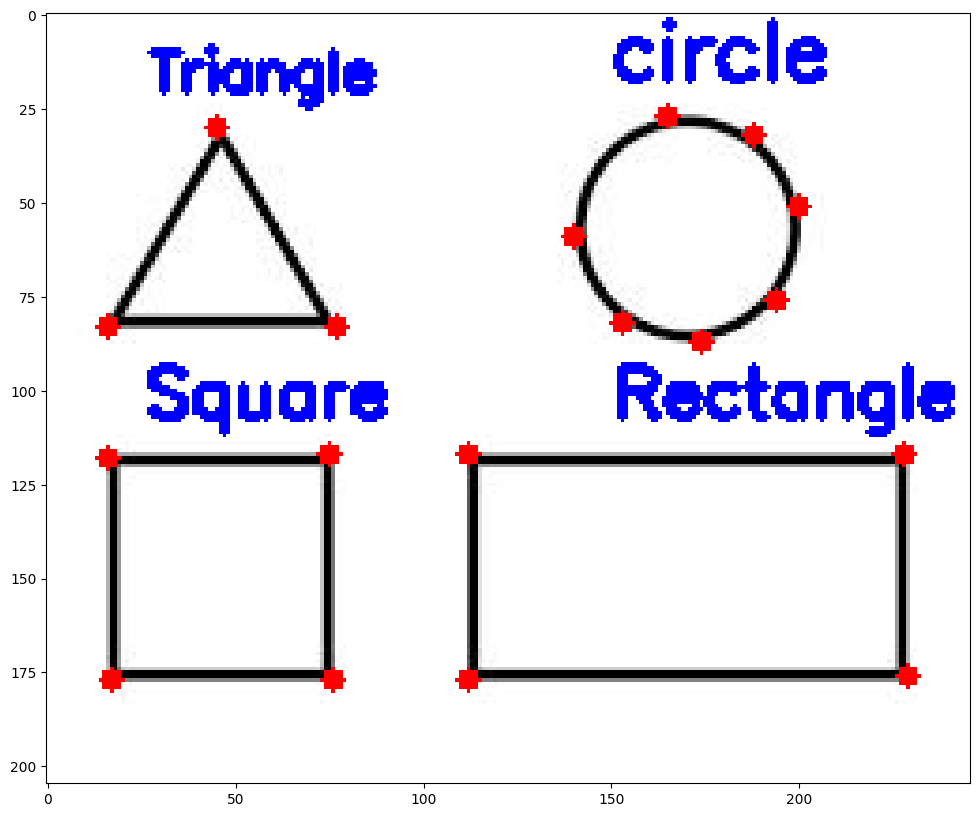

In [136]:
def draw_shape(img, contour):
    #cv2.arcLength calculates the perimeter of the contour
    #its true because the contour is closed that means it is a shape
    perimeter = cv2.arcLength(contour, True)

    #cv2.approxPolyDP approximates the polygonal curves with the specified precision
    #0.04 is the precision
    #True because the contour is closed
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    #cv2.boundingRect returns the coordinates of the rectangle enclosing the contour
    #x, y are the coordinates of the top left corner of the rectangle
    #w, h are the width and height of the rectangle
    (x, y, w, h) = cv2.boundingRect(approx)


    text_x = int(x + w/2 - 20)
    text_y = y - 10
    
    #if the number of corners is 3 then it is a triangle
    if len(approx) == 3:
        #approx.squeeze() 
        for corner in approx.squeeze():
            #cv2.circle draws a circle on the image
            cv2.circle(img, tuple(corner), 3, (255, 0, 0), -1)
        #cv2.putText draws the text on the image
        cv2.putText(img, "Triangle", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    #if the number of corners is 4 then it is a square or rectangle
    elif len(approx) == 4:
        for corner in approx.squeeze():
            cv2.circle(img, tuple(corner), 3, (255, 0, 0), -1)
        #aspect ratio is the ratio of width to height
        #if the aspect ratio is 1 then it is a square
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img, "Square", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        else:
            cv2.putText(img, "Rectangle", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    
    #if the number of corners is 5 then it is a circle
    elif len(approx)> 5:
        for corner in approx.squeeze():
            cv2.circle(img, tuple(corner), 3, (255, 0, 0), -1)
        cv2.putText(img, "circle", (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    return img

for contour in contours:
    image = draw_shape(image, contour)
    plt.imshow(image, cmap='gray')
    
